In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston.data.shape

(506, 13)

In [8]:
feature_df = pd.DataFrame(np.array(boston.data), columns = [boston.feature_names])

In [9]:
feature_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


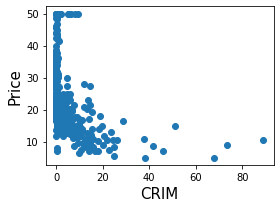

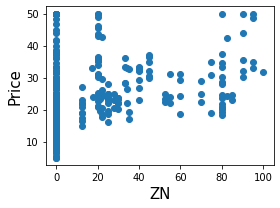

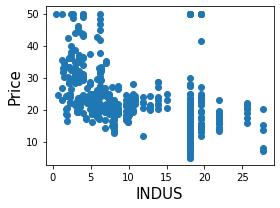

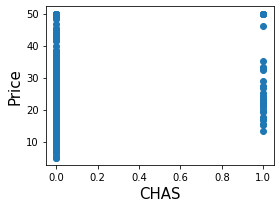

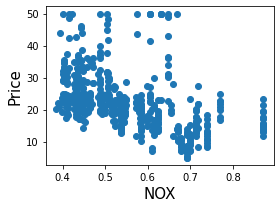

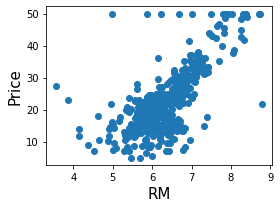

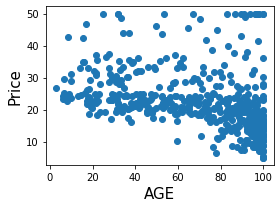

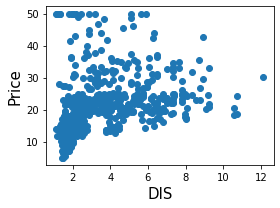

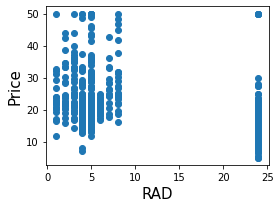

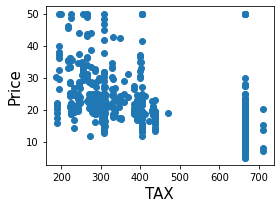

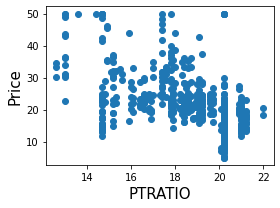

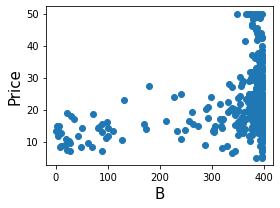

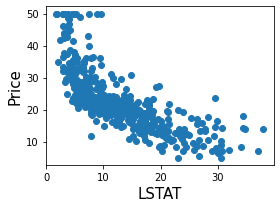

In [10]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize = (4,3))
    plt.scatter(boston.data[:, index], boston.target)
    
    plt.ylabel("Price", size = 15)
    plt.xlabel(feature_name, size = 15)
    
    plt.tight_layout()

plt.show()    

In [11]:
price_df = pd.DataFrame(np.array(boston.target), columns = ["price"])

In [12]:
price_df.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(feature_df)

StandardScaler()

In [15]:
features_scaled_df = pd.DataFrame(data=scaler.transform(feature_df),
                                 columns=feature_df.columns)

In [16]:
x_train, x_test, y_train, y_test = \
train_test_split(feature_df, price_df, test_size = 0.2, random_state = 101)

In [17]:
type(x_train),type(x_test),type(y_train),type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [18]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [19]:
type(x_train), type(x_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [20]:
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [21]:
y_train.shape, y_test.shape

((404, 1), (102, 1))

In [22]:
reg_model = LinearRegression()

In [23]:
reg_model.fit(x_train, y_train)

LinearRegression()

In [24]:
print("Weight", reg_model.coef_)

Weight [[-9.89913563e-02  4.25047578e-02  1.67390094e-02  3.06437882e+00
  -1.56462528e+01  4.01888422e+00 -8.31558474e-04 -1.44628034e+00
   2.67827281e-01 -1.04725485e-02 -8.88651815e-01  8.25262805e-03
  -5.49367192e-01]]


In [25]:
print("Bias", reg_model.intercept_)

Bias [32.90613091]


In [26]:
predicted = reg_model.predict(x_test)
expected = y_test

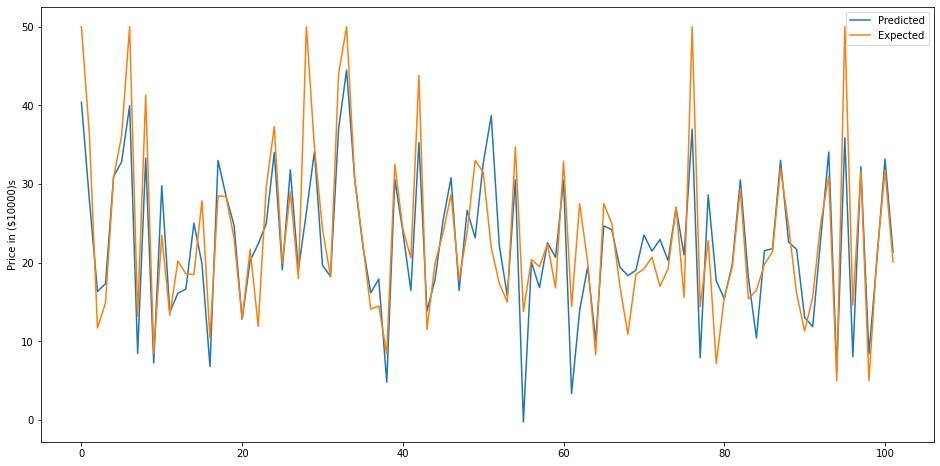

In [27]:
plt.figure(figsize=(16,8))

plt.plot(predicted, label = "Predicted",)
plt.plot(expected, label = "Expected")


plt.ylabel("Price in ($10000)s")
plt.legend()

plt.show()


In [28]:
import tensorflow as tf

In [29]:
tf.compat.v1.disable_eager_execution()
tf.compat.v1.reset_default_graph()

In [30]:
epochs = 1000
num_features = x_train.shape[1]

In [31]:
 feat_cols = [tf.feature_column.numeric_column('x', shape=num_features)]

In [34]:
train_input_fun = tf.compat.v1.estimator.inputs.numpy_input_fn(
{'x':x_train},
y_train,
batch_size = 12,
num_epochs = epochs,
shuffle = True)

In [35]:
linear_model = tf.estimator.LinearRegressor(feature_columns = feat_cols,
                                           optimizer = 'Adam')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpwocz5r9m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [36]:
linear_model.train(input_fn = train_input_fun, steps = 1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.


c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Admin\AppData\Local\Temp\tmpwocz5r9m\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 467.43002, step = 0
INFO:tensorflow:global_step/sec: 424.067
INFO:tensorflow:loss = 67.50038, step = 100 (0.220 sec)
INFO:tensorflow:global_step/sec: 676.292
INFO:tensorflow:loss = 11.229581, step = 200 (0.170 sec)
INFO:tensorflow:global_step/sec: 372.099
INFO:tensorflow:loss = 60.589264, step = 300 (0.247 sec)
INFO:tensorflow:global_step/sec: 425.927
INFO:tensorflow:loss = 30.8311, step = 400 (0.235 sec)
INFO:tensorflow:global_step/s

In [37]:
eval_input_fun = tf.compat.v1.estimator.inputs.numpy_input_fn(
{'x':x_test},
y_test,
batch_size = 1,
num_epochs = 1,
shuffle = False)

In [38]:
test_metrics = linear_model.evaluate(input_fn = eval_input_fun, steps = 100)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-29T16:59:17Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpwocz5r9m\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [10/100]
INFO:tensorflow:Evaluation [20/100]
INFO:tensorflow:Evaluation [30/100]
INFO:tensorflow:Evaluation [40/100]
INFO:tensorflow:Evaluation [50/100]
INFO:tensorflow:Evaluation [60/100]
INFO:tensorflow:Evaluation [70/100]
INFO:tensorflow:Evaluation [80/100]
INFO:tensorflow:Evaluation [90/100]
INFO:tensorflow:Evaluation [100/100]
INFO:tensorflow:Inference Time : 0.72194s
INFO:tensorflow:Finished evaluation at 2020-12-29-16:59:18
INFO:tensorflow:Saving dict for global step 1000: average_loss = 81.58218, global_step = 1000, label/mean = 23.257008, loss = 81.58218, prediction/mean = 18.020998
INFO:tensorflow:S

In [48]:
prediction_results = linear_model.predict(input_fn = eval_input_fun)

In [49]:
prediction_results

<generator object Estimator.predict at 0x0000024286463678>

In [50]:
prediction_list = list(prediction_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpwocz5r9m\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [46]:
prediction_list

[{'predictions': array([32.426365], dtype=float32)},
 {'predictions': array([21.044275], dtype=float32)},
 {'predictions': array([21.172346], dtype=float32)},
 {'predictions': array([18.019428], dtype=float32)},
 {'predictions': array([25.613018], dtype=float32)},
 {'predictions': array([25.412834], dtype=float32)},
 {'predictions': array([32.12401], dtype=float32)},
 {'predictions': array([8.585703], dtype=float32)},
 {'predictions': array([25.546028], dtype=float32)},
 {'predictions': array([6.7439857], dtype=float32)},
 {'predictions': array([23.263956], dtype=float32)},
 {'predictions': array([11.45639], dtype=float32)},
 {'predictions': array([13.238823], dtype=float32)},
 {'predictions': array([14.557148], dtype=float32)},
 {'predictions': array([18.518509], dtype=float32)},
 {'predictions': array([17.93991], dtype=float32)},
 {'predictions': array([10.17017], dtype=float32)},
 {'predictions': array([28.23251], dtype=float32)},
 {'predictions': array([20.617926], dtype=float32)},

In [52]:
predictions = []

for prediction in prediction_list:
    predictions.append(prediction['predictions'][0])
    

In [53]:
predictions[:10]

[32.426365,
 21.044275,
 21.172346,
 18.019428,
 25.613018,
 25.412834,
 32.12401,
 8.585703,
 25.546028,
 6.7439857]

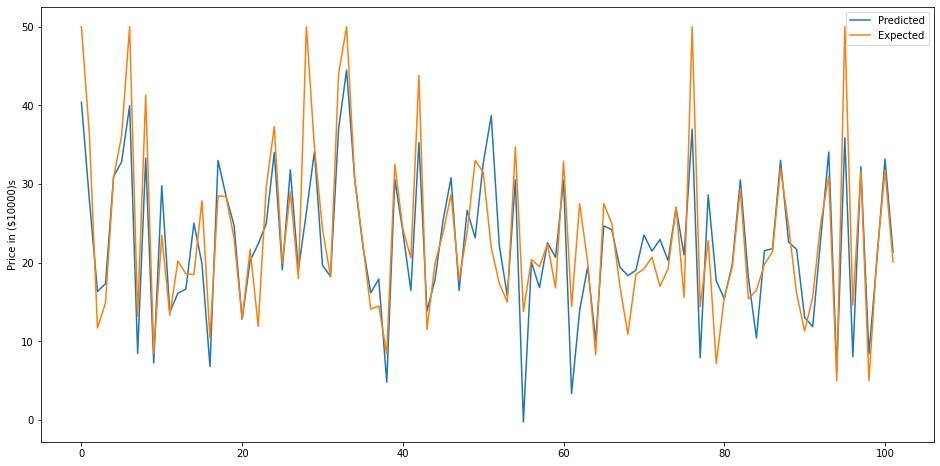

In [54]:
plt.figure(figsize=(16,8))

plt.plot(predicted, label = "Predicted",)
plt.plot(expected, label = "Expected")


plt.ylabel("Price in ($10000)s")
plt.legend()

plt.show()